In [150]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('capstone_1_clean.csv', index_col=0)

1. Ask the following questions and look for the answers using code and plots:

Can you count something interesting?

In [3]:
df.head(3)

,player_id,name,full_team,position,age,date,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
0,18182,Steve Ramsey,New Orleans Saints,QB,22-242,1970-12-20,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,14,False,CHI,Chicago Bears,24,0,2,0,39.6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.0,155.153846,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,0.384615
1,18182,Steve Ramsey,Denver Broncos,QB,23-157,1971-09-26,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,A,2,False,GNB,Green Bay Packers,34,7,8,0,142.2,0,0,1,69,13,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,2.76,0.00,0.0,0,0,0,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.0,56.000000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.000000
2,18182,Steve Ramsey,Denver Broncos,QB,23-171,1971-10-10,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,4,False,OAK,Oakland Raiders,27,6,16,2,40.1,0,0,1,98,16,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,3.92,0.08,0.0,0,0,0,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.0,107.000000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,0.666667


In [4]:
# Count how many rows of player game data there are for each position

df['position'].value_counts()

WR    84038
RB    80325
TE    49318
QB    31031
K     22050
Name: position, dtype: int64

In [6]:
# Count how many rows of player game data there are for each year

In [5]:
year_count = df.groupby('year_of_game')['player_id'].count()
year_count

year_of_game
1966.0    1437
1967.0    1698
1968.0    2030
1969.0    2133
1970.0    3050
1971.0    3311
1972.0    3347
1973.0    3576
1974.0    4219
1975.0    3974
1976.0    4258
1977.0    4441
1978.0    5433
1979.0    5305
1980.0    5352
1981.0    5383
1982.0    3054
1983.0    5744
1984.0    5944
1985.0    5545
1986.0    5463
1987.0    5284
1988.0    5562
1989.0    5618
1990.0    5594
1991.0    5477
1992.0    5491
1993.0    5385
1994.0    5381
1995.0    5845
1996.0    5855
1997.0    5902
1998.0    5705
1999.0    5936
2000.0    5837
2001.0    5780
2002.0    5997
2003.0    6027
2004.0    6000
2005.0    6139
2006.0    6032
2007.0    6098
2008.0    6116
2009.0    6165
2010.0    6291
2011.0    6400
2012.0    6459
2013.0    6434
2014.0    6392
2015.0    6274
2016.0    6298
2017.0    4291
Name: player_id, dtype: int64

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Text(0, 0.5, '# of player game entries (rows)')

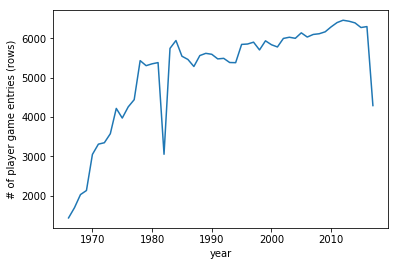

In [91]:
plt.plot(year_count)
plt.xlabel('year')
plt.ylabel('# of player game entries (rows)')

The number of player entries trends upward over time, with two notable exceptions; 1982 and 2017. The first is a result of a players strike that shortened the 1982 season to only 9 games. The second was because the player dataset was scraped during the middle of the 2017 season.

In [7]:
df[['passing_rating']][df['passing_rating'] > 0].describe()

,passing_rating
count,27348.000000
mean,77.102757
std,32.650040
min,0.300000
25%,52.500000
50%,76.600000
75%,99.500000
max,158.300000


The summary statistics above give us insight into the QB ratings in the dataset. A "0" for this statistic implies that a player did not have any passing statistics, or never entered the field of play. I filtered out these rows, giving us a more accurate picture of the summary statistics for a quarterback's passer rating.

In [8]:
# How many players not listed as a Quarterback had a passer rating > 0 (i.e. threw passes during the game)?

df[['passing_rating']][df['passing_rating'] > 0][df['position'] != 'QB'].count()

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


passing_rating    1270
dtype: int64

Can you make a bar plot or a histogram?

In [9]:
total_win_pct = df.groupby('full_team')[['game_won', 'player_id']].agg({'game_won':'sum', 'player_id':'count'})

In [11]:
total_win_pct['win_pct'] = total_win_pct['game_won'] / total_win_pct['player_id']

In [12]:
total_win_pct

,game_won,player_id,win_pct
full_team,,,
Arizona Cardinals,2127.0,4786,0.444421
Atlanta Falcons,4091.0,9325,0.438713
Baltimore Colts,1077.0,2437,0.441937
Baltimore Ravens,2249.0,4153,0.541536
Boston Patriots,91.0,369,0.246612
Buffalo Bills,4063.0,8836,0.459823
Carolina Panthers,2177.0,4339,0.501729
Chicago Bears,4224.0,8815,0.479183
Cincinnati Bengals,4200.0,9162,0.458415


Text(0, 0.5, '# of teams')

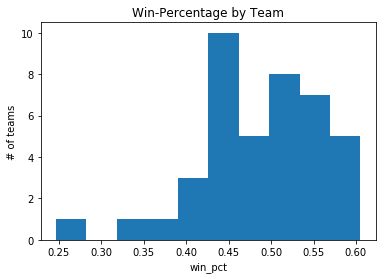

In [13]:
plt.hist(total_win_pct['win_pct'], bins=10)
plt.title('Win-Percentage by Team')
plt.xlabel('win_pct')
plt.ylabel('# of teams')

Can you compare two related quantities?

In [14]:
df_copy = df.copy(deep=True)

In [15]:
df_copy.sort_values('datetime', inplace=True)

In [16]:
df_copy.head(10)

,player_id,name,full_team,position,age,date,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
286329,20842,Matt Snell,New York Jets,RB,25-022,1966-09-09,1941-08-18,"Garfield, GA",Ohio St.,6-2,"Carle Place, NY",219.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,1,0,0,19,14,0,31,0,0.5,1.9,0,3.1,0,0.00,0.00,0.0,0,0,0,5.50,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
185145,22645,Jim Turner,New York Jets,K,25-165,1966-09-09,1941-03-28,"Martinez, CA",Utah St.,6-2,"John Swett, CA",205.0,3,1,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,3.5,2,-2,0,3.50,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
150408,23556,Sammy Weir,New York Jets,WR,25-175,1966-09-09,1941-03-18,"Moxie, AR",Arkansas St.,5-9,"Walnut Ridge, AR",170.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
41338,16174,Joe Namath,New York Jets,QB,23-101,1966-09-09,1943-05-31,"Beaver Falls, PA",Alabama,6-2,"Beaver Falls, PA",200.0,0,0,A,1,True,MIA,Miami Dolphins,14,8,19,1,37.2,0,0,0,100,19,0,0,0,0,0,0,1,0,3,0,0.0,0.0,0,0.3,0,4.00,0.04,0.0,0,0,0,4.34,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
146120,12807,Pete Lammons,New York Jets,TE,22-324,1966-09-09,1943-10-20,"Crockett, TX",Texas,6-3,"Jacksonville, TX",230.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,3,0,0,53,0,0,0,0,1.5,5.3,0,0.0,0,0.00,0.00,0.0,0,0,0,6.80,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
230054,21743,Mike Taliaferro,New York Jets,QB,25-045,1966-09-09,1941-07-26,"Houston, TX",Illinois,6-2,"Wheaton, IL",202.0,0,0,A,1,True,MIA,Miami Dolphins,14,4,17,1,37.1,0,0,1,61,19,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,2.44,0.04,0.0,0,0,0,6.48,1966-09-09,Miami Dolphins,1966.0,1966.0,14.0,23.0,11.0,32.0,88.0,1.0,5.0,2.0,13.0,2.8,34.4,14.1,23.0,94.0,4.1,0.0,0.0,3.0,2.0,2.0,5.0,88.0,0-1-0,12.0,182.0,5.0,16.0,257.0,241.0,16.0,6.0,0.0
270693,1853,George Blanda,Houston Oilers,QB,38-358,1966-09-10,1927-09-17,"Youngwood, PA",Kentucky,6-2,"Youngwood, PA",215.0,2,1,H,2,Tr

In [17]:
df_copy.set_index('datetime', inplace=True)
df_copy.sort_index()

,player_id,name,full_team,position,age,date,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1966-09-09,20842,Matt Snell,New York Jets,RB,25-022,1966-09-09,1941-08-18,"Garfield, GA",Ohio St.,6-2,"Carle Place, NY",219.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,1,0,0,19,14,0,31,0,0.5,1.9,0,3.1,0,0.00,0.00,0.0,0,0,0,5.50,Miami Dolphins,1966.0,1966.0,14.000000,23.000000,11.000000,32.000000,88.000000,1.000000,5.000000,2.000000,13.000000,2.800000,34.400000,14.100000,23.000000,94.000000,4.100000,0.000000,0.000000,3.000000,2.000000,2.000000,5.000000,88.000000,0-1-0,12.000000,182.000000,5.000000,16.000000,257.000000,241.000000,16.000000,6.000000,0.000000
1966-09-09,22645,Jim Turner,New York Jets,K,25-165,1966-09-09,1941-03-28,"Martinez, CA",Utah St.,6-2,"John Swett, CA",205.0,3,1,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,3.5,2,-2,0,3.50,Miami Dolphins,1966.0,1966.0,14.000000,23.000000,11.000000,32.000000,88.000000,1.000000,5.000000,2.000000,13.000000,2.800000,34.400000,14.100000,23.000000,94.000000,4.100000,0.000000,0.000000,3.000000,2.000000,2.000000,5.000000,88.000000,0-1-0,12.000000,182.000000,5.000000,16.000000,257.000000,241.000000,16.000000,6.000000,0.000000
1966-09-09,23556,Sammy Weir,New York Jets,WR,25-175,1966-09-09,1941-03-18,"Moxie, AR",Arkansas St.,5-9,"Walnut Ridge, AR",170.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00,Miami Dolphins,1966.0,1966.0,14.000000,23.000000,11.000000,32.000000,88.000000,1.000000,5.000000,2.000000,13.000000,2.800000,34.400000,14.100000,23.000000,94.000000,4.100000,0.000000,0.000000,3.000000,2.000000,2.000000,5.000000,88.000000,0-1-0,12.000000,182.000000,5.000000,16.000000,257.000000,241.000000,16.000000,6.000000,0.000000
1966-09-09,16174,Joe Namath,New York Jets,QB,23-101,1966-09-09,1943-05-31,"Beaver Falls, PA",Alabama,6-2,"Beaver Falls, PA",200.0,0,0,A,1,True,MIA,Miami Dolphins,14,8,19,1,37.2,0,0,0,100,19,0,0,0,0,0,0,1,0,3,0,0.0,0.0,0,0.3,0,4.00,0.04,0.0,0,0,0,4.34,Miami Dolphins,1966.0,1966.0,14.000000,23.000000,11.000000,32.000000,88.000000,1.000000,5.000000,2.000000,13.000000,2.800000,34.400000,14.100000,23.000000,94.000000,4.100000,0.000000,0.000000,3.000000,2.000000,2.000000,5.000000,88.000000,0-1-0,12.000000,182.000000,5.000000,16.000000,257.000000,241.000000,16.000000,6.000000,0.000000
1966-09-09,12807,Pete Lammons,New York Jets,TE,22-324,1966-09-09,1943-10-20,"Crockett, TX",Texas,6-3,"Jacksonville, TX",230.0,0,0,A,1,True,MIA,Miami Dolphins,14,0,0,0,0.0,0,0,0,0,19,0,0,3,0,0,53,0,0,0,0,1.5,5.3,0,0.0,0,0.00,0.00,0.0,0,0,0,6.80,Miami Dolphins,1966.0,1966.0,14.000000,23.000000,11.000000,32.000000,88.0

In [18]:
df_copy.groupby('year_of_game')['fp_total'].agg('mean')

year_of_game
1966.0    8.021294
1967.0    7.583640
1968.0    7.135980
1969.0    6.844501
1970.0    5.321790
1971.0    5.091139
1972.0    5.509435
1973.0    5.167332
1974.0    4.602394
1975.0    5.448062
1976.0    5.348985
1977.0    4.800820
1978.0    4.925827
1979.0    5.432275
1980.0    5.563838
1981.0    5.703526
1982.0    5.239299
1983.0    5.463858
1984.0    5.259149
1985.0    5.644191
1986.0    5.586597
1987.0    5.518497
1988.0    5.393301
1989.0    5.492303
1990.0    5.265813
1991.0    5.225978
1992.0    5.146436
1993.0    5.393404
1994.0    5.643687
1995.0    5.945872
1996.0    5.694511
1997.0    5.607675
1998.0    5.895755
1999.0    5.812985
2000.0    5.893706
2001.0    5.899606
2002.0    6.125303
2003.0    5.834608
2004.0    6.150550
2005.0    5.842711
2006.0    5.991084
2007.0    6.143116
2008.0    6.100118
2009.0    6.163598
2010.0    6.185284
2011.0    6.146750
2012.0    6.164465
2013.0    6.332919
2014.0    6.284797
2015.0    6.564629
2016.0    6.451743
2017.0    6.167257

In [19]:
df_qb = df_copy[df_copy['position']=='QB']

In [20]:
# Remove QBs that didn't enter the game
df_qb = df_qb[df_qb['passing_rating'] > 0]

In [56]:
df_qb_by_year = df_qb.groupby('year_of_game')[['fp_total', 'player_team_score']].agg({'fp_total':'mean', 'player_team_score':'mean'})
df_qb_by_year

,fp_total,player_team_score
year_of_game,,
1966.0,11.275046,22.747685
1967.0,11.790870,22.393720
1968.0,10.603880,21.593533
1969.0,11.119206,21.101737
1970.0,9.838993,19.473684
1971.0,9.456193,19.256881
1972.0,10.249197,19.793187
1973.0,9.196787,19.434053
1974.0,10.033413,18.448687


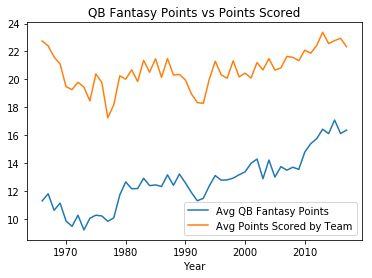

In [57]:
plt.plot(df_qb_by_year.index, df_qb_by_year['fp_total'])
plt.plot(df_qb_by_year.index, df_qb_by_year['player_team_score'])
plt.title('QB Fantasy Points vs Points Scored')
plt.xlabel('Year')
L = plt.legend()
L.get_texts()[0].set_text('Avg QB Fantasy Points')
L.get_texts()[1].set_text('Avg Points Scored by Team')

In [ ]:
month_list = []

for i in range(len(df_qb.index)):
    month_list.append(datetime.strptime(df_qb.index[i], "%Y-%m-%d").month)
    
month_list

In [ ]:
df_qb['month'] = month_list

Can you make a scatterplot?

In [23]:
len(df_qb)

26078

Text(0, 0.5, 'Total Points Scored')

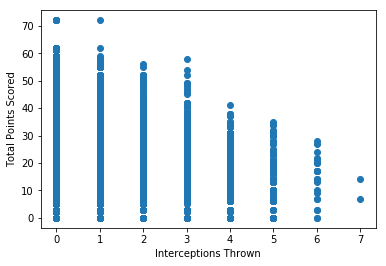

In [58]:
plt.scatter(df['passing_interceptions'], df['player_team_score'])
plt.xlabel('Interceptions Thrown')
plt.ylabel('Total Points Scored')

Text(0, 0.5, 'Fantasy Points Scored')

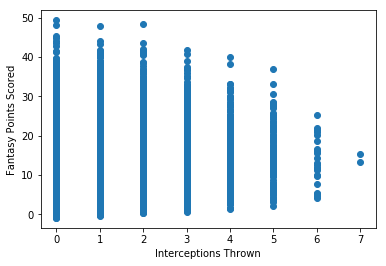

In [93]:
plt.scatter(df_qb['passing_interceptions'], df_qb['fp_total'])
plt.xlabel('Interceptions Thrown')
plt.ylabel('Fantasy Points Scored')

Text(0, 0.5, 'Fantasy Points Scored')

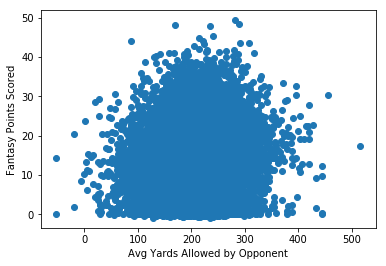

In [97]:
plt.scatter(df_qb['PassY_allowed'], df_qb['fp_total'])
plt.xlabel('Avg Pass Yards Allowed by Opponent')
plt.ylabel('Fantasy Points Scored')

In [94]:
df_qb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26078 entries, 1966-09-09 to 2017-11-30
Data columns (total 86 columns):
player_id                    26078 non-null int64
name                         26078 non-null object
full_team                    26078 non-null object
position                     26078 non-null object
age                          26078 non-null object
date                         26078 non-null object
birth_date                   26078 non-null object
birth_place                  26075 non-null object
college                      26078 non-null object
height                       26078 non-null object
high_school                  26075 non-null object
weight                       26078 non-null float64
field_goal_attempts          26078 non-null int64
field_goal_makes             26078 non-null int64
game_location                26078 non-null object
game_number                  26078 non-null int64
game_won                     26078 non-null bool
opponent            

Text(0, 0.5, 'Fantasy Points Scored')

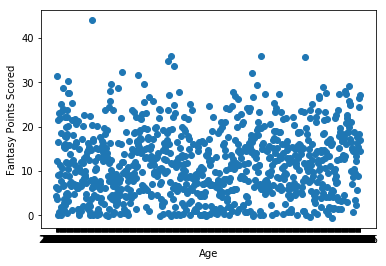

In [99]:
plt.scatter(df_qb['age'][df_qb['full_team']=='New York Jets'], df_qb['fp_total'][df_qb['full_team']=='New York Jets'])
plt.xlabel('Age')
plt.ylabel('Fantasy Points Scored')

In [44]:
df_wr = df[df['position']=='WR']

In [46]:
len(df_wr)

84038

In [47]:
# Only include wide receivers that had at least 1 target.
df_wr = df_wr[df_wr['receiving_targets'] > 0]

In [48]:
len(df_wr)

42412

In [52]:
df_wr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42412 entries, 364 to 304446
Data columns (total 87 columns):
player_id                    42412 non-null int64
name                         42412 non-null object
full_team                    42412 non-null object
position                     42412 non-null object
age                          42412 non-null object
date                         42412 non-null object
birth_date                   42412 non-null object
birth_place                  42183 non-null object
college                      42388 non-null object
height                       42411 non-null object
high_school                  42277 non-null object
weight                       42411 non-null float64
field_goal_attempts          42412 non-null int64
field_goal_makes             42412 non-null int64
game_location                42412 non-null object
game_number                  42412 non-null int64
game_won                     42412 non-null bool
opponent                  

Text(0.5, 1.0, 'Fantasy Points Scored vs Opponent Pass Defense')

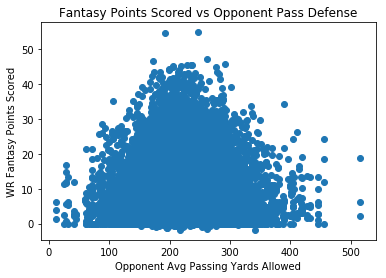

In [62]:
plt.scatter(df_wr['PassY_allowed'], df_wr['fp_total'])
plt.xlabel('Opponent Avg Passing Yards Allowed')
plt.ylabel('WR Fantasy Points Scored')
plt.title('Fantasy Points Scored vs Opponent Pass Defense')

Can you make a time-series plot?

In [81]:
tom_brady = df_qb[df_qb['player_id']==2240]
tom_brady

,player_id,name,full_team,position,age,date,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-11-23,2240,Tom Brady,New England Patriots,QB,23-112,2000-11-23,1977-08-03,"San Mateo, CA",Michigan,6-4,"Junipero Serra, CA",225.0,0,0,A,12,False,DET,Detroit Lions,34,1,3,0,42.4,0,0,0,6,9,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.24,0.00,0.0,0,0,0,0.24,Detroit Lions,2000.0,2000.0,19.363636,19.818182,17.363636,32.272727,169.545455,1.000000,1.181818,3.272727,18.818182,5.254545,53.390909,63.363636,26.727273,98.636364,3.654545,0.909091,1.454545,2.000000,1.727273,1.727273,6.363636,209.545455,7-4-0,16.181818,268.181818,1.818182,18.363636,332.454545,211.727273,120.727273,2.909091,0.636364
2001-09-23,2240,Tom Brady,New England Patriots,QB,24-051,2001-09-23,1977-08-03,"San Mateo, CA",Michigan,6-4,"Junipero Serra, CA",225.0,0,0,H,2,False,NYJ,New York Jets,10,5,10,0,62.9,0,0,0,46,3,0,0,0,0,0,0,1,0,9,0,0.0,0.0,0,0.9,0,1.84,0.00,0.0,0,0,0,2.74,New York Jets,2001.0,2001.0,24.000000,45.000000,18.000000,31.000000,192.000000,2.000000,0.000000,1.000000,7.000000,6.200000,58.100000,97.800000,29.000000,138.000000,4.800000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,120.000000,0-1-0,17.000000,330.000000,2.000000,22.000000,376.000000,222.000000,154.000000,3.000000,0.000000
2001-09-30,2240,Tom Brady,New England Patriots,QB,24-058,2001-09-30,1977-08-03,"San Mateo, CA",Michigan,6-4,"Junipero Serra, CA",225.0,0,0,H,3,True,IND,Indianapolis Colts,13,13,23,0,79.6,1,9,0,168,44,0,0,0,0,0,0,1,0,2,0,0.0,0.0,0,0.2,0,6.72,0.00,0.0,0,0,0,6.92,Indianapolis Colts,2001.0,2001.0,43.500000,25.000000,22.500000,30.500000,320.000000,3.000000,2.000000,1.000000,6.000000,10.650000,74.050000,106.350000,30.000000,145.500000,4.850000,2.000000,0.500000,1.000000,6.000000,6.000000,1.500000,22.500000,2-0-0,25.000000,465.500000,3.000000,19.000000,352.000000,210.500000,141.500000,1.500000,1.000000
2001-10-07,2240,Tom Brady,New England Patriots,QB,24-065,2001-10-07,1977-08-03,"San Mateo, CA",Michigan,6-4,"Junipero Serra, CA",225.0,0,0,A,4,False,MIA,Miami Dolphins,30,12,24,0,58.7,4,17,0,86,10,0,0,0,0,0,0,2,0,9,0,0.0,0.0,0,0.9,0,3.44,0.00,0.0,0,0,0,4.34,Miami Dolphins,2001.0,2001.0,19.666667,26.666667,15.666667,27.000000,209.666667,1.000000,1.333333,1.000000,5.666667,8.200000,59.166667,82.266667,30.666667,96.666667,3.100000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,179.666667,2-1-0,15.000000,306.333333,2.666667,19.333333,324.000000,216.000000,108.000000,1.000000,0.666667
2001-10-14,2240,Tom Brady,New England Patriots,QB,24-072,2001-10-14,1977-08-03,"San Mateo, CA",Michigan,6-4,"Junipero Serra, CA",225.0,0,0,H,5,True,SDG,San Diego Chargers,26,33,54,0,93.4,3,19,2,364,29,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0,0.0,8,14.56,0.00,0.0,0,0,0,22.

Text(0, 0.5, 'QB Rating')

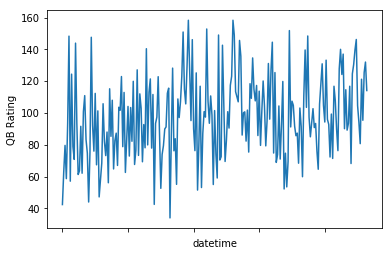

In [155]:
tom_brady['passing_rating'].plot()
plt.ylabel('QB Rating')

2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Insights

- Quarterbacks have seen an increase in average fantasy points scored over the past 50 years. Average points scored in a game have increased as well, but at a lower rate than QB fantasy points. 

- There may be a correlation between a fantasy points and opponent defense (e.g. total yards allowed). Specifically, for a quarterback, opponent passing yards allowed may be of interest, versus a running back, where opponent rushing yards allowed are suspected to be correlated.  Interestingly, the plots above suggest that fantasy points increase as yards allowed increase, but only to a point. For example, as an opponent's passing yards allowed grows very large, wide receiver fantasy points begin to decline.

- Future exploration can examine whether other opponent statistics are strongly correlated with high fantasy points. For example, the presense of a strong running game may lead to lower fantasy points for wide receivers, or vice versa. Points scored, or opponent points scored might be also have a strong correlation. Other areas to explore may revolve around a players physical characteristics. For instance, it may be that taller wide receivers score more fantasy points on average.

3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Story

- Fantasy football is a popular game for many sports fans, ranging from the casual player to the high stakes better. At every level, players seek to best the competition through their own research. But no matter how much research is performed, a high level of uncertainty remains.

- In what month do Quarterback fantasy points tend to be at their highest?

Text(0, 0.5, 'Avg Fantasy Points (QB)')

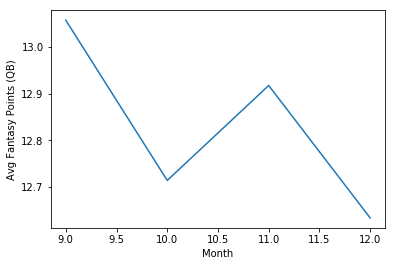

In [136]:
plt.plot(df_qb.groupby('month')['fp_total'].agg('mean').iloc[1:].index, df_qb.groupby('month')['fp_total'].agg('mean').iloc[1:])
plt.xlabel('Month')
plt.ylabel('Avg Fantasy Points (QB)')

- How much does an opponent's pass-defense factor in to a wide_receiver's fantasy output?

Text(0.5, 1.0, 'Fantasy Points Scored vs Opponent Pass Defense')

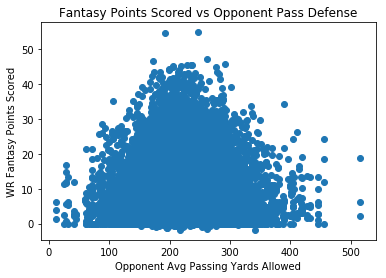

In [137]:
plt.scatter(df_wr['PassY_allowed'], df_wr['fp_total'])
plt.xlabel('Opponent Avg Passing Yards Allowed')
plt.ylabel('WR Fantasy Points Scored')
plt.title('Fantasy Points Scored vs Opponent Pass Defense')

With the amount of data available from past player performance, and the strengths and weaknesses of an opponent, we begin to see a picture of the factors that are typical of a high fantasy football score.

- Are passing attempts or passing completions more correlated with fantasy points? 

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(27.125, 0.5, 'QB Fantasy Points Scored')

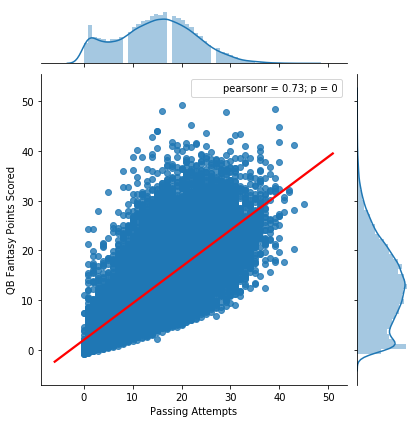

In [153]:
plot = sns.jointplot(df_qb['passing_attempts'], df_qb['fp_total'], kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
plot.annotate(pearsonr)

plt.xlabel('Passing Attempts')
plt.ylabel('QB Fantasy Points Scored')

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(27.125, 0.5, 'QB Fantasy Points Scored')

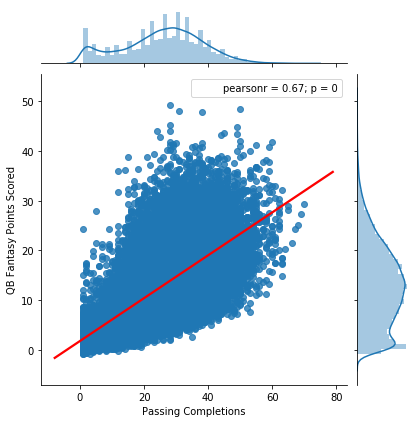

In [154]:
plot2 = sns.jointplot(df_qb['passing_completions'], df_qb['fp_total'], kind='reg')
regline = plot2.ax_joint.get_lines()[0]
regline.set_color('red')
plot2.annotate(pearsonr)

plt.xlabel('Passing Completions')
plt.ylabel('QB Fantasy Points Scored')

- These are just some examples of the insights we can gain from the data.

Nothing is certain, but with the right combination of predictive variables, you can be confident you are selecting the players that will give you the highest probability of winning your fantasy football league.